<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-03-24 13:38:46--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv.3’

survey-data.csv.3   100%[===================>] 152.13M  72.2MB/s    in 2.1s    

2025-03-24 13:38:50 (72.2 MB/s) - ‘survey-data.csv.3’ saved [159525875/159525875]



**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [2]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 171.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 195.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 158.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 140.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 94.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 165.7 MB/s eta 0:00:00


**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [3]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [4]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [5]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [6]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [7]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [9]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


       CompTotal
72     2040000.0
374      28000.0
379      85000.0
385      50000.0
389     110000.0
...          ...
65396    36000.0
65401    40000.0
65408    61000.0
65412    58000.0
65431    55000.0

[33740 rows x 1 columns]


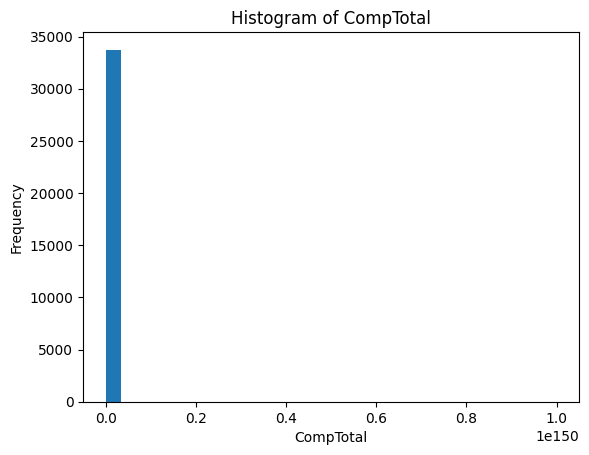

In [21]:
## Write your code here

# Create a connection to your SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# SQL query
QUERY = """
SELECT CompTotal
FROM main
"""

# Load the data into pandas DataFrame
df = pd.read_sql_query(QUERY, conn)


# Remove NaN values in the 'CompTotal' column
df_cleaned = df.dropna(subset=['CompTotal'], axis=0)

# Check the cleaned DataFrame
print(df_cleaned)

# Create the histogram plot
df_cleaned['CompTotal'].plot(kind='hist', bins=30)  
plt.title('Histogram of CompTotal')
plt.xlabel('CompTotal')
plt.ylabel('Frequency')
plt.show()



**Box Plots**

Plot a box plot of Age.


/tmp/ipykernel_305/2493734535.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].replace({
/tmp/ipykernel_305/2493734535.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Age'] = pd.to_numeric(df_cleaned['Age'], errors='coerce')


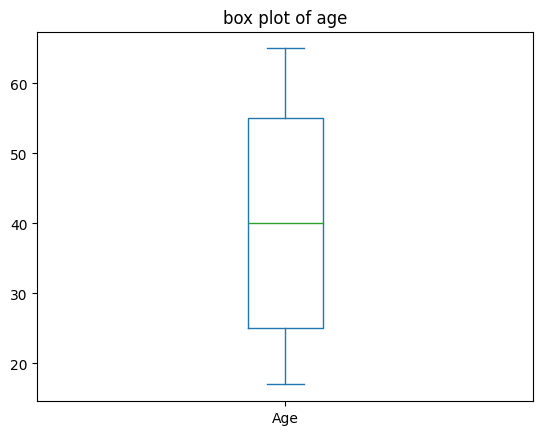

In [12]:
## Write your code here

# Create a connection to your SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# SQL query
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""

# Load the data into pandas DataFrame
df = pd.read_sql_query(QUERY, conn)

# Map the Age column values to specific numeric values
df['Age'].replace({
    '25-34 years old': 30,
    '35-44 years old': 40,
    '18-24 years old': 20,
    '45-54 years old': 50,
    '55-64 years old': 60,
    'Under 18 years old': 17,
    '65 years or older': 65
}, inplace=True)

# Remove rows with 'Prefer not to say' in 'Age' column
df_cleaned = df[~df['Age'].isin(['Prefer not to say'])]

# Convert 'Age' column to numeric values 
df_cleaned['Age'] = pd.to_numeric(df_cleaned['Age'], errors='coerce')

df_cleaned['Age'].plot(kind='box')
plt.title('box plot of age')
plt.show()




### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


/tmp/ipykernel_305/2011359794.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].replace({
/tmp/ipykernel_305/2011359794.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Age'] = pd.to_numeric(df_cleaned['Age'], errors='coerce')
/tmp/ipykernel_305/2011359794.py

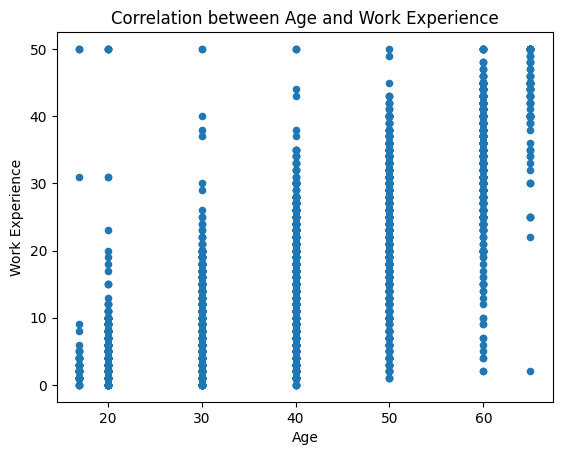

In [13]:
## Write your code here

# Create a connection to your SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# SQL query
QUERY = """
SELECT Age, WorkExp
FROM main
"""

# Load the data into pandas DataFrame
df = pd.read_sql_query(QUERY, conn)

# Map the Age column values to specific numeric values
df['Age'].replace({
    '25-34 years old': 30,
    '35-44 years old': 40,
    '18-24 years old': 20,
    '45-54 years old': 50,
    '55-64 years old': 60,
    'Under 18 years old': 17,
    '65 years or older': 65
}, inplace=True)

# Remove rows with 'Prefer not to say' in 'Age' column
df_cleaned = df[~df['Age'].isin(['Prefer not to say'])]

# Convert 'Age' and WorkExp column to numeric values 
df_cleaned['Age'] = pd.to_numeric(df_cleaned['Age'], errors='coerce')
df_cleaned['WorkExp'] = pd.to_numeric(df_cleaned['WorkExp'], errors='coerce')

df_cleaned.plot(kind='scatter', x='Age', y='WorkExp', title='Correlation between Age and Work Experience')
plt.ylabel('Work Experience')
plt.xlabel('Age')
plt.show()


**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


In [25]:
## Write your code here

# Create a connection to your SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# SQL query
QUERY = """
SELECT Age, TimeSearching, Frustration
FROM main
"""

# Load the data into pandas DataFrame
df = pd.read_sql_query(QUERY, conn)

# Map the Age column values to specific numeric values
df['Age'].replace({
    '25-34 years old': 30,
    '35-44 years old': 40,
    '18-24 years old': 20,
    '45-54 years old': 50,
    '55-64 years old': 60,
    'Under 18 years old': 17,
    '65 years or older': 65
}, inplace=True)

# Remove rows with 'Prefer not to say' in 'Age' column
df_cleaned = df[~df['Age'].isin(['Prefer not to say'])]

# Map the TimeSearching column values to specific numeric values
df['TimeSearching'].replace({
    '30-60 minutes a day': 60,
    '15-30 minutes a day': 30,
    '60-120 minutes a day': 120,
    'Less than 15 minutes a day': 15,
    'Over 120 minutes a day': 150
}, inplace=True)

# Convert 'Age' and 'TimeSearching' columns to numeric values 
df_cleaned['Age'] = pd.to_numeric(df_cleaned['Age'], errors='coerce')
df['TimeSearching'] = pd.to_numeric(df['TimeSearching'], errors='coerce')

# 'Frustration' is a non-numeric column with multiple different answers. Could convert this into a numeric scale and use this to plot a bubble graph


/tmp/ipykernel_305/2058741908.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].replace({
/tmp/ipykernel_305/2058741908.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}

### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


  DatabaseWantToWorkWith  count
0                   None  22879
1             PostgreSQL   3738
2      PostgreSQL;SQLite   1533
3                 SQLite   1476
4   Microsoft SQL Server   1431


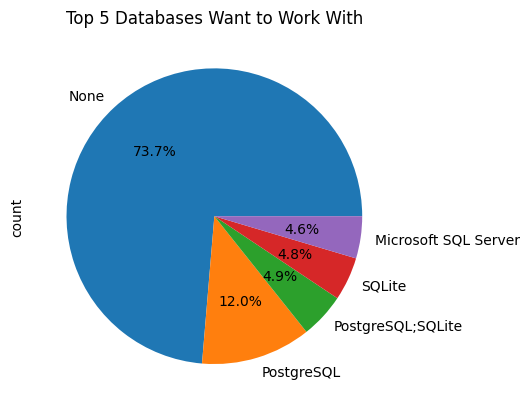

In [26]:
## Write your code here

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Create a connection to your SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# SQL query to fetch the top 5 databases based on count
QUERY_SELECT = """
SELECT DatabaseWantToWorkWith, COUNT(*) as count
FROM main
GROUP BY DatabaseWantToWorkWith
ORDER BY count DESC
LIMIT 5
"""

# Load the data into pandas DataFrame
df_DatabaseWantToWorkWith = pd.read_sql_query(QUERY_SELECT, conn)

# Check the first few rows to ensure data is as expected
print(df_DatabaseWantToWorkWith.head())

# Plot the pie chart using value_counts() to get the count of each unique value
# Set index to 'DatabaseWantToWorkWith' for proper plotting
df_DatabaseWantToWorkWith.set_index('DatabaseWantToWorkWith')['count'].plot(kind='pie', autopct='%1.1f%%')

# Set the title
plt.title('Top 5 Databases Want to Work With')

# Display the plot
plt.show()

# Close the connection
conn.close()



**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


/tmp/ipykernel_305/2302959613.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TimeSearching'].replace({
/tmp/ipykernel_305/2302959613.py:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['TimeSearching'].replace({
/tmp/ipykernel_305/2302959613.py:36: FutureWarning: A value is trying to b

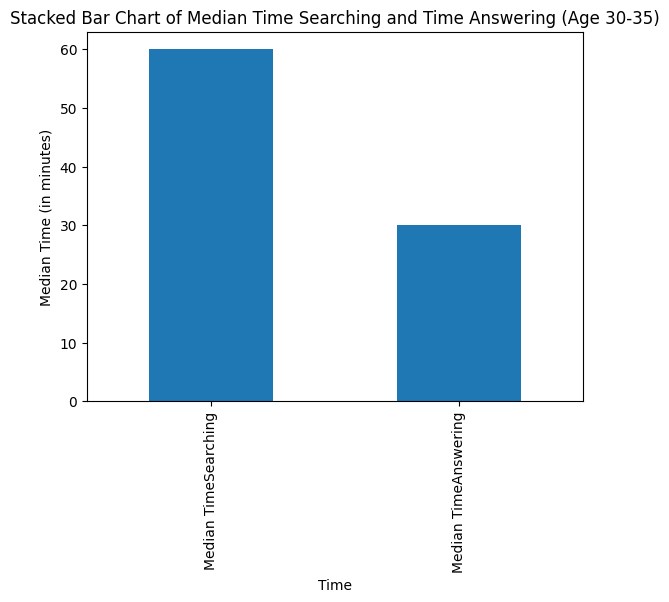

In [27]:
## Write your code here

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Create a connection to your SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# SQL query to get data for the age group 30 to 35 (we only have age group of 25-34)
QUERY = """
SELECT TimeSearching, TimeAnswering
FROM main
WHERE Age == '25-34 years old'
"""

# Load the data into pandas DataFrame
df = pd.read_sql_query(QUERY, conn)

# Close the connection
conn.close()

# Look at data and map to workable data

# Map the TimeSearching column values to specific numeric values
df['TimeSearching'].replace({
    '30-60 minutes a day': 60,
    '15-30 minutes a day': 30,
    '60-120 minutes a day': 120,
    'Less than 15 minutes a day': 15,
    'Over 120 minutes a day': 150
}, inplace=True)


# Map the TimeAnswering column values to specific numeric values
df['TimeAnswering'].replace({
    '30-60 minutes a day': 60,
    '15-30 minutes a day': 30,
    '60-120 minutes a day': 120,
    'Less than 15 minutes a day': 15,
    'Over 120 minutes a day': 150
}, inplace=True)

# Convert 'TimeSearching' and 'TimeAnswering' columns to numeric values 
df['TimeSearching'] = pd.to_numeric(df['TimeSearching'], errors='coerce')
df['TimeAnswering'] = pd.to_numeric(df['TimeAnswering'], errors='coerce')

# Calculate the median of TimeSearching and TimeAnswering
median_values = df.median()

# Prepare data for plotting: we will create a new DataFrame with these values for stacked bar chart
data_for_plotting = pd.DataFrame({
    'Time': ['Median TimeSearching', 'Median TimeAnswering'],
    'Value': [median_values['TimeSearching'], median_values['TimeAnswering']]
})

# Plotting the stacked bar chart
data_for_plotting.set_index('Time').plot(kind='bar', stacked=True, legend=False)

# Set the title and labels
plt.title('Stacked Bar Chart of Median Time Searching and Time Answering (Age 30-35)')
plt.ylabel('Median Time (in minutes)')

# Display the plot
plt.show()





### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


Unique Age values in the DataFrame: ['45-54 years old' '55-64 years old']
Median CompTotal for each age group:
 Age
45-54 years old    130000.0
55-64 years old    135000.0
Name: CompTotal, dtype: float64


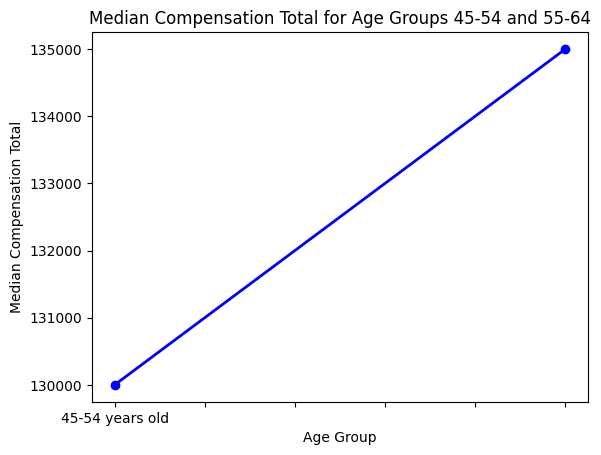

In [28]:
## Write your code here

## Ages 45-60 are the following groups: 45-54 years old', '55-64 years old'

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Create a connection to your SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# SQL query to get data for the age groups '45-54 years old', '55-64 years old'
QUERY = """
SELECT Age, CompTotal
FROM main
WHERE Age = '45-54 years old' OR Age = '55-64 years old'
"""

# Load the data into pandas DataFrame
df = pd.read_sql_query(QUERY, conn)

# Close the connection
conn.close()

# Remove rows with NaN values in the 'CompTotal' column
df = df.dropna(subset=['CompTotal'])

# Check the unique values in the 'Age' column to verify if '55-64 years old' is present
print("Unique Age values in the DataFrame:", df['Age'].unique())

# Group by Age and calculate the median CompTotal for each age group
median_comp_total = df.groupby('Age')['CompTotal'].median()

# Check if '55-64 years old' exists in the grouped data
print("Median CompTotal for each age group:\n", median_comp_total)

# Plotting the line chart
median_comp_total.plot(kind='line', marker='o', color='b', linestyle='-', linewidth=2)

# Set chart title and labels
plt.title('Median Compensation Total for Age Groups 45-54 and 55-64')
plt.xlabel('Age Group')
plt.ylabel('Median Compensation Total')

# Display the plot
plt.show()








**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


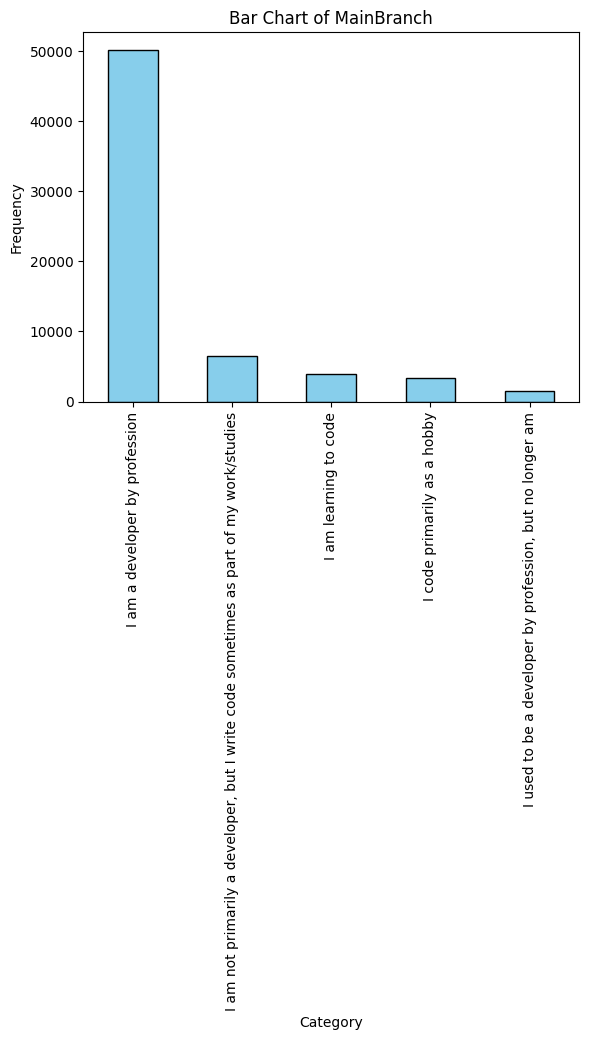

In [29]:
## Write your code here

# Create a connection to your SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# SQL query to get data for the age groups '45-54 years old', '55-64 years old'
QUERY = """
SELECT MainBranch
FROM main
"""

# Load the data into pandas DataFrame
df = pd.read_sql_query(QUERY, conn)

# Close the connection
conn.close()

# Count the occurrences of each unique value in the 'main_column_name' column
value_counts = df['MainBranch'].value_counts()

# Plotting the bar chart
value_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Set chart title and labels
plt.title('Bar Chart of MainBranch')
plt.xlabel('Category')
plt.ylabel('Frequency')

# Display the plot
plt.show()




### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [ ]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
